In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# Read lyrics

In [2]:
lyrics = pd.read_csv('lyrics.csv')
lyrics['hit'] = pd.read_csv('audio_features.csv')['hit'].values
lyrics.dropna(inplace=True)
lyrics

,name,artists,lyrics,hit
1,"10,000 Reasons (Bless The Lord) [Radio Version...",Matt Redman,"10,000 reasons for my heart to sing Bless the...",0.0
2,100 Proof,Kellie Pickler,Ain't no rain as cold as the look she just gav...,0.0
3,101,Alicia Keys,You used to the sound of a heart that's breaki...,0.0
4,1313,The Big Pink,"Convey your thoughts, translate them well Say ...",0.0
5,1961,The Fray,"Two brothers, 1961 On a road 90 miles too long...",0.0
...,...,...,...,...
20571,TALES OF DOMINICA,Lil Nas X,"Woke up on the floor Oh, this plastic bed don'...",1.0
20572,ONE OF ME (feat. Elton John),"Lil Nas X, Elton John","I like this, I don't like that Do this here, d...",1.0
20573,LOST IN THE CITADEL,Lil Nas X,"Tell me, are you feeling down? Are you happy, ...",1.0
20574,In Da Getto,"J Balvin, Skrillex",Party inna di ghetto Inna di ghetto Party in d...,1.0


# Vectorize data

In [3]:
# remove punctuations
#lyrics['lyrics'] = lyrics['lyrics'].str.replace('.', '').str.replace(',', '').str.replace('-', ' ').str.replace("'", '').str.replace('"', '').replace('?', '')

# tokenize lyrics
def tokenize(text): 
    # initialize tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    # remove stop words
    tokens = [token for token in tokens if (token not in stopwords.words('english')) and token.isalpha()]
    # initialize stemmer
    stemmer = SnowballStemmer('english')
    # semming all tokens
    stems = [stemmer.stem(token) for token in tokens] 
    return tokens, stems

tokenized = []
stemmed = []

for i in lyrics['lyrics']:
    tokens, stems = tokenize(i)
    tokenized.append(tokens)
    stemmed.append(stems)
    
lyrics['tokenized'] = [' '.join(i) for i in tokenized]
lyrics['stemmed'] = [' '.join(i) for i in stemmed]
lyrics

,name,artists,lyrics,hit,tokenized,stemmed
1,"10,000 Reasons (Bless The Lord) [Radio Version...",Matt Redman,"10,000 reasons for my heart to sing Bless the...",0.0,reasons heart sing bless lord soul soul worshi...,reason heart sing bless lord soul soul worship...
2,100 Proof,Kellie Pickler,Ain't no rain as cold as the look she just gav...,0.0,rain cold look gave everyone around us knows s...,rain cold look gave everyon around us know sto...
3,101,Alicia Keys,You used to the sound of a heart that's breaki...,0.0,used sound heart breaking know faze anymore ki...,use sound heart break know faze anymor king ga...
4,1313,The Big Pink,"Convey your thoughts, translate them well Say ...",0.0,convey thoughts translate well say words baite...,convey thought translat well say word bait bre...
5,1961,The Fray,"Two brothers, 1961 On a road 90 miles too long...",0.0,two brothers road miles long someone want us t...,two brother road mile long someon want us toge...
...,...,...,...,...,...,...
20571,TALES OF DOMINICA,Lil Nas X,"Woke up on the floor Oh, this plastic bed don'...",1.0,woke floor oh plastic bed blow broken home eve...,woke floor oh plastic bed blow broken home eve...
20572,ONE OF ME (feat. Elton John),"Lil Nas X, Elton John","I like this, I don't like that Do this here, d...",1.0,like like say one say one yeah yeah say one sa...,like like say one say one yeah yeah say one sa...
20573,LOST IN THE CITADEL,Lil Nas X,"Tell me, are you feeling down? Are you happy, ...",1.0,tell feeling happy dreams still seem inbound t...,tell feel happi dream still seem inbound tell ...
20574,In Da Getto,"J Balvin, Skrillex",Party inna di ghetto Inna di ghetto Party in d...,1.0,party inna di ghetto inna di ghetto party di g...,parti inna di ghetto inna di ghetto parti di g...


In [4]:
#lyrics.to_csv('lyrics_processed.csv')

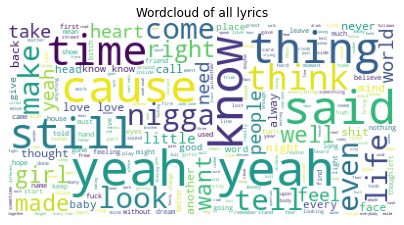

In [5]:
text = ' '.join([i for i in ' '.join(lyrics['tokenized']).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of all lyrics')
plt.show()

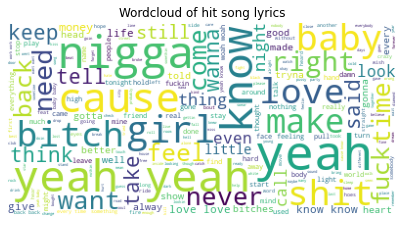

In [6]:
text_hit = ' '.join([i for i in ' '.join(lyrics.loc[lyrics['hit']==1,'tokenized']).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_hit = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text_hit)
plt.imshow(wordcloud_hit)
plt.axis('off')
plt.title('Wordcloud of hit song lyrics')
plt.show()

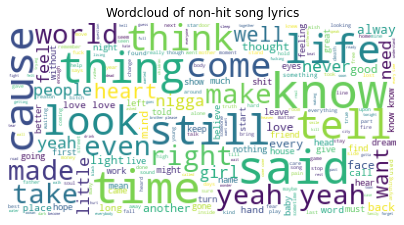

In [7]:
text_nonhit = ' '.join([i for i in ' '.join(lyrics.loc[lyrics['hit']==0,'tokenized']).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_nonhit = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text_nonhit)
plt.imshow(wordcloud_nonhit)
plt.axis('off')
plt.title('Wordcloud of non-hit song lyrics')
plt.show()

In [8]:
cv = CountVectorizer(input='content', 
                     stop_words='english',
                     lowercase=True,
                     strip_accents='ascii',
                     max_features=500)
dtm = cv.fit_transform(lyrics['stemmed'])
df_cv = pd.DataFrame(dtm.toarray(),
                      columns=cv.get_feature_names())
df_cv = df_cv[[c for c in df_cv.columns if len(c)>3 and len(c)<11]]
df_cv.head()

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,wonder,word,work,world,worri,write,wrong,yeah,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_cv.to_csv('lyrics_cv.csv', index=False)